# Pandas + dates + times

Mirrored at: https://github.com/reuven/SFPython-2021-08Aug-18

# Agenda

1. Date/time concepts and data structures
2. Timestamp columns (how to read them)
3. Time delta columns (what they are, and how to work with them)
4. Date/time indexes on data frames
5. Time series and resampling


# Time and date concepts

There are basically two of them:

- One moment in time (when the meeting starts, or when you were born) -- timestamp/datetime, representing one specific moment
- A span of time (how long the meeting goes, or how long you have been alive) -- timedelta -- doesn't have a specific start or end, but rather is a length of time

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
df = pd.read_csv('taxi.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [4]:
df = pd.read_csv('taxi.csv',
                usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                        'trip_distance',
                        'passenger_count',
                        'total_amount'])

In [5]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount
0,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80
1,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30
2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,11.00
3,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16
4,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   9999 non-null   object 
 1   tpep_dropoff_datetime  9999 non-null   object 
 2   passenger_count        9999 non-null   int64  
 3   trip_distance          9999 non-null   float64
 4   total_amount           9999 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.7+ KB


In [9]:
df = pd.read_csv('taxi.csv',
                usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                        'trip_distance',
                        'passenger_count',
                        'total_amount'],
                 parse_dates=['tpep_pickup_datetime',
                             'tpep_dropoff_datetime']
                )

In [10]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount
0,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80
1,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30
2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,11.00
3,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16
4,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   9999 non-null   datetime64[ns]
 1   tpep_dropoff_datetime  9999 non-null   datetime64[ns]
 2   passenger_count        9999 non-null   int64         
 3   trip_distance          9999 non-null   float64       
 4   total_amount           9999 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 390.7 KB


In [17]:
df['tpep_pickup_datetime'].dt.hour.value_counts()

11    4396
15    2536
0     2439
16     628
Name: tpep_pickup_datetime, dtype: int64

In [18]:
df['tpep_pickup_datetime'].dt.hour.value_counts(normalize=True)

11    0.439644
15    0.253625
0     0.243924
16    0.062806
Name: tpep_pickup_datetime, dtype: float64

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:ylabel='tpep_pickup_datetime'>

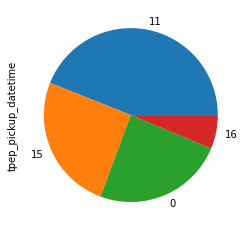

In [22]:
df['tpep_pickup_datetime'].dt.hour.value_counts().plot.pie()

In [23]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour


In [24]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,pickup_hour,dropoff_hour
0,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80,11,11
1,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30,11,11
2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,11.00,11,11
3,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16,11,11
4,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30,11,11


In [25]:
(df['pickup_hour'] == df['dropoff_hour']).value_counts()

True     8778
False    1221
dtype: int64

In [26]:
df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

0      0 days 00:28:23
1      0 days 00:08:26
2      0 days 00:10:59
3      0 days 00:19:31
4      0 days 00:13:17
             ...      
9994   0 days 00:11:19
9995   0 days 00:15:17
9996   0 days 00:24:25
9997   0 days 00:06:08
9998   0 days 00:23:29
Length: 9999, dtype: timedelta64[ns]

In [27]:
df['trip_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [30]:
df[df['trip_time'] == '00:15:00']

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,pickup_hour,dropoff_hour,trip_time
816,2015-06-02 11:21:10,2015-06-02 11:36:10,1,0.80,10.8,11,11,0 days 00:15:00
1698,2015-06-02 11:26:12,2015-06-02 11:41:12,1,0.92,11.8,11,11,0 days 00:15:00
3802,2015-06-02 11:30:13,2015-06-02 11:45:13,1,1.04,10.8,11,11,0 days 00:15:00
7951,2015-06-06 16:52:08,2015-06-06 17:07:08,1,2.50,13.3,16,17,0 days 00:15:00
9099,2015-06-01 00:07:55,2015-06-01 00:22:55,1,4.30,16.8,0,0,0 days 00:15:00


In [31]:
df[df['trip_time'] == '15 minutes']

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,pickup_hour,dropoff_hour,trip_time
816,2015-06-02 11:21:10,2015-06-02 11:36:10,1,0.80,10.8,11,11,0 days 00:15:00
1698,2015-06-02 11:26:12,2015-06-02 11:41:12,1,0.92,11.8,11,11,0 days 00:15:00
3802,2015-06-02 11:30:13,2015-06-02 11:45:13,1,1.04,10.8,11,11,0 days 00:15:00
7951,2015-06-06 16:52:08,2015-06-06 17:07:08,1,2.50,13.3,16,17,0 days 00:15:00
9099,2015-06-01 00:07:55,2015-06-01 00:22:55,1,4.30,16.8,0,0,0 days 00:15:00


In [32]:
df[df['trip_time'] > '5 hours']

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,pickup_hour,dropoff_hour,trip_time
126,2015-06-02 11:21:03,2015-06-03,3,1.06,11.16,11,0,0 days 12:38:57


In [33]:
df = df.set_index('tpep_pickup_datetime')

In [34]:
df.head()

,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,pickup_hour,dropoff_hour,trip_time
tpep_pickup_datetime,,,,,,,
2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80,11,11,0 days 00:28:23
2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30,11,11,0 days 00:08:26
2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,11.00,11,11,0 days 00:10:59
2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16,11,11,0 days 00:19:31
2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30,11,11,0 days 00:13:17


In [35]:
df.loc['2015-06-02 11:19:32']

,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,pickup_hour,dropoff_hour,trip_time
tpep_pickup_datetime,,,,,,,
2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30,11,11,0 days 00:13:17
2015-06-02 11:19:32,2015-06-02 11:41:50,1,1.68,18.36,11,11,0 days 00:22:18
2015-06-02 11:19:32,2015-06-02 11:36:04,6,4.20,17.30,11,11,0 days 00:16:32
2015-06-02 11:19:32,2015-06-02 11:27:28,1,1.10,7.80,11,11,0 days 00:07:56
2015-06-02 11:19:32,2015-06-02 11:38:08,3,2.10,16.55,11,11,0 days 00:18:36
2015-06-02 11:19:32,2015-06-02 11:30:07,1,1.00,8.80,11,11,0 days 00:10:35


In [36]:
df.loc['2015-06-02 11:19']

,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,pickup_hour,dropoff_hour,trip_time
tpep_pickup_datetime,,,,,,,
2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80,11,11,0 days 00:28:23
2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30,11,11,0 days 00:08:26
2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,11.00,11,11,0 days 00:10:59
2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16,11,11,0 days 00:19:31
2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30,11,11,0 days 00:13:17
...,...,...,...,...,...,...,...
2015-06-02 11:19:56,2015-06-02 11:24:18,1,0.60,7.80,11,11,0 days 00:04:22
2015-06-02 11:19:57,2015-06-02 11:26:37,1,0.90,8.16,11,11,0 days 00:06:40
2015-06-02 11:19:58,2015-06-02 11:27:59,1,0.90,9.80,11,11,0 days 00:08:01
